# Section 3: Convolutional Neural Networks (CNNs)

Here we will get familiar with new neural network architecture call Convolutional Neural Networks (CNN). All modern advances in computer vision are based on this idea of Convolutional Neural Networks.

Following examples are covered during this section

    1) Our first CNN (Classification Problem) - Hand Written Digit Recognition

    2) Image to Image Prediction (Transpose Convolution) - Face Masking

<hr>
<hr>
<hr>

In [2]:
'''first, let's import libraries '''

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Conv2DTranspose

#### Why we need convolution neural networks (CNNs) ?

In vanilla neural networks, all neurons are connected from one layer to another. But in case of images, all features are localized. As example, if we are trying to recognize a face in an image, neural network should focus on a part of the image that face is located. This can be achieved by introducing convolution operations in to neural network. In convolution operations, small window (kernel) is passed through an image to detect these localize features as below,

<img src="./graphics/convolution.png" width="60%"/>
<sub>Source of the figure: https://stanford.edu/~shervine/teaching/cs-230/</sub>

On the other hand, lot's research in neuro sciences proves that human vision is hierarchical in nature. As example of human face, we first detect different kinds of edges (primary spatial features), second we see combination of different kinds of edges forming noses, eyes, mounth, etc. And then we see combination of noses, eyes, mouth, etc. (secondary spatial features) forming a full face. By stacking convolutional layers in a neural network, we can learn these hierarchical features which is very important in computer vision context.

Following figure shows what different layers in CNN is learned in case of a human face which is consistence with models of hierarchical representation in neuro science.

<img src="./graphics/WhatCNNLearn.PNG" width="60%"/>
<sub>Source of the figure: https://arxiv.org/ftp/arxiv/papers/1509/1509.01951.pdf</sub>

Additionally to convolution operations, operation call Max-pooling is also included in CNNs. Max-pooling operations extract maximum value from a region of an image (typically 2by2-pixel region) as below. And max-pooling operation reduced sizes when image is going to deeper levels of the neural network. This introduce translation invariance as well as increase efficiency of calculations of convolution operations in deeper layers in CNNs.

<img src="./graphics/max-pooling.png" width="40%"/>
<sub>Source of the figure: https://stanford.edu/~shervine/teaching/cs-230/</sub>

So typically CNNs include set of convolutional and max pooling layers. So let's go ahead and built a simple CNN for hand written digital character recognition.

## 1) Our first CNN (Classification Problem) - Hand Written Digit Recognition

Here we will use classic data set in computer vision research call MNIST from Tensorflow (Keras) library. First let's load the dataset.

In [3]:
from keras.datasets import mnist

# data is already randomized and split in to training / test sets. So we can go ahead and use them as it is.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

Using TensorFlow backend.


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


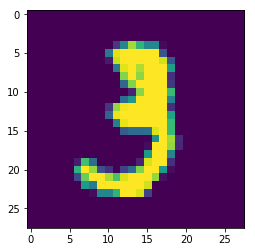

Corresponding Y value: 3


In [4]:
# Let's plot a sample image and print corresponding output

plt.imshow(x_train[10, :, :])
plt.show()

print('Corresponding Y value: ' + str(y_train[10]))

And CNN require, input data in 4 dimensions (batch size, height, width, number of bands). Since we have gray-scale images, we have single band. In case of RGB images, number of bands must be 3. So let's reshape input data in order to compatible with CNN input.

In [5]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

Now let's perform one-hot encoding to encode digit class with in-built Keras function.

In [6]:
# one-hot encoding

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# And let's print new sizes of input and output variables

print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28, 1)
y_train shape (60000, 10)
X_test shape (10000, 28, 28, 1)
y_test shape (10000, 10)


Now let's define the CNN by adding few combinations of Convolution and Max-pooling layers. And finally, we will __*Flatten*__ the output of CNN converting 2D output into 1D output. Now as in vanilla neural networks, we can use __*Dense*__ layers which we are already got familiar in the last section.

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1))) # 32 convolution filters
model.add(MaxPooling2D(pool_size=(2, 2))) # reducing width and height by 1/2 with max pooling
model.add(Conv2D(64, kernel_size=3, activation='relu')) # 64 convolution filters
model.add(MaxPooling2D(pool_size=(2, 2))) # reducing width and height by 1/2 with max pooling
model.add(Conv2D(64, kernel_size=3, activation='relu')) # 64 convolution filters

model.add(Flatten())
model.add(Dense(10, activation='softmax')) # 10 units corresponding to 10 classes of digits

# since this is a classification problem, cross-entropy is better as a loss.
model.compile(optimizer='adam', loss='categorical_crossentropy') 

# this will print details of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5770      
Total para

In [13]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=1000, verbose=0)

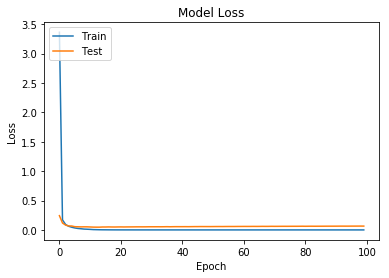

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
'''Prediction over the test dataset'''
pred_test = model.predict(x_test)

#let's compare random predicted and actual y values 
print('Predicted: '+str(np.round(pred_test[12]))+', Actual: '+str(y_test[12]))

Predicted: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], Actual: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Another Nice Visualization about what CNN learns can be seen here with this URL - https://www.cs.ryerson.ca/~aharley/vis/conv/

## 2) Image to Image Prediction (Transpose Convolution) - Face Masking

Now let's move in to an example that input and output both are images which is very common in satellite image analysis.

In this example, we will use subset of "Labeled Faces in the Wild (LFW) Dataset". This dataset includes input RGB images of faces and output images of face masks (They are single band images. Pixel labels are either 0-background or 1-inside the face).

So here in this example, let's build a CNN to detect face mask from RGB face images. And here, input and output both are images going beyond simple regression or classification that we did in last examples.

In [16]:
'''loading data'''

# data is already randomized and split in to training / test sets. So we can go ahead and use them as it is.
x_train = np.load('./data/LFW/face_train.npy').astype('float32')
y_train= np.load('./data/LFW/mask_train.npy').astype('float32')
x_test = np.load('./data/LFW/face_test.npy').astype('float32')
y_test = np.load('./data/LFW/mask_test.npy').astype('float32') 

print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("y_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (70, 128, 128, 3)
y_train shape (70, 128, 128, 1)
y_test shape (30, 128, 128, 3)
y_test shape (30, 128, 128, 1)


In [17]:
x_train = (np.load('./../nn_face/face_xx_train.npy')*255).astype('uint8')
y_train= np.load('./../nn_face/mask_yy_train.npy').astype('uint8')
x_test = (np.load('./../nn_face/face_xx_test.npy')*255).astype('uint8')
y_test = np.load('./../nn_face/mask_yy_test.npy').astype('uint8') 

np.save('./data/LFW/face_train.npy', x_train)
np.save('./data/LFW/mask_train.npy', y_train)
np.save('./data/LFW/face_test.npy', x_test)
np.save('./data/LFW/mask_test.npy', y_test)

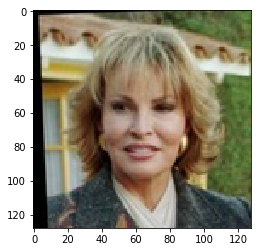

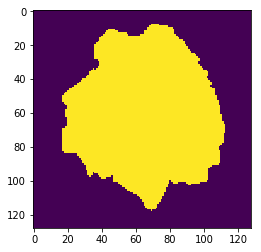

In [18]:
'''let's visualize sample input and output data pair'''

plt.imshow(x_train[5, :, :, :].astype('uint8'))
plt.show()

plt.imshow(y_train[5, :, :, 0])
plt.show()

As in our last example, due to convolutional and max-pooling operations, we are losing resolution through the CNN. Since in this example, we are generating another image as an output, we should introduce another trainable operation to upscale with in neural network. This operation is called transpose convolution. And upscaling is achieved by performing transpose convolution with strides (skipping some pixels while going through entire image with a kernel).

These figure shows transpose convolution without (top) and with (bottom) strides (Blue maps are inputs, and cyan maps are outputs)

<img src="./graphics/t-convolution.gif" width="30%"/>
<img src="./graphics/t-convolution-strides.gif" width="30%"/>
<sub>Source of the figure: https://github.com/vdumoulin/conv_arithmetic/</sub>

In [19]:
'''defining the model'''

model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))

model.add(Conv2DTranspose(64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2DTranspose(64, kernel_size=3, padding='same', activation='relu', strides=(2, 2)))
model.add(Conv2DTranspose(32, kernel_size=3, padding='same', activation='relu', strides=(2, 2)))
model.add(Conv2DTranspose(32, kernel_size=3, padding='same', activation='relu', strides=(2, 2)))

model.add(Conv2DTranspose(1, kernel_size=3, padding='same', activation='relu'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [20]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=10, verbose=0)

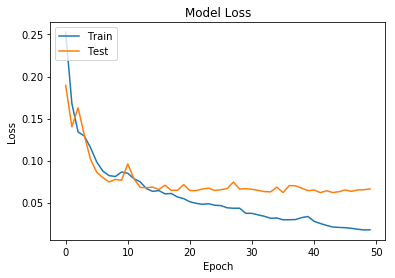

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

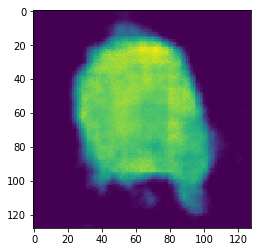

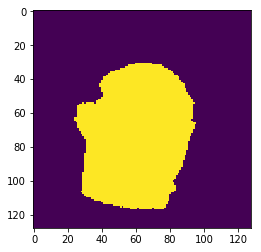

In [22]:
'''Prediction over the test dataset'''
pred_test = model.predict(x_test)

#let's compare sample predicted, actual face mask and input face image
plt.imshow(pred_test[15, :, :, 0])
plt.show()
plt.imshow(y_test[15,:,:,0])
plt.show()

*Exercise: Calculate confusion matrix and total accuracy over the test dataset*

This is not an operational model with high accuracy. But with more layers and with more data, we can develop this architecture in to an operational model with high accuracy.